In [1]:
#@title MONTAR EL DRIVE  (If you are in in colab){ display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/RESEARCH/2022_SPDlearning_MiniCourse')
print(os.getcwd())



Mounted at /content/drive
/content/drive/MyDrive/RESEARCH/2022_SPDlearning_MiniCourse


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable

Suppose we have an image of $W\times H$. That is, an image with $m = W\cdot H$ pixels. 


In [3]:
img = plt.imread("imgs/granadilla.jpg")

print(f"Tipo: {type(img)}")
print(f"Dimensión: {img.shape}")

Tipo: <class 'numpy.ndarray'>
Dimensión: (600, 600, 3)


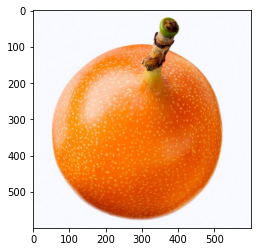

In [4]:
plt.imshow(img)
plt.show()

We can use features to construct covariance descriptors. For example:

$[R(x,y), G(x,y), B(x,y), |\frac{\partial R}{\partial x}|, |\frac{\partial R}{\partial y}|, |\frac{\partial G}{\partial x}|, |\frac{\partial G}{\partial Y}|, |\frac{\partial B}{\partial x}|, |\frac{\partial B}{\partial Y}|]$

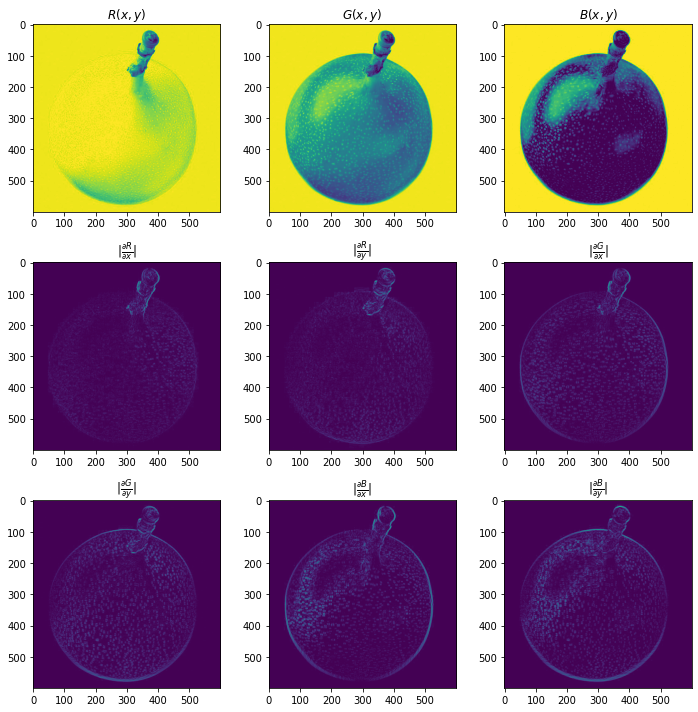

In [6]:
feature_r = img[:,:,0]
feature_g = img[:,:,1]
feature_b = img[:,:,2]

dx_r = np.abs(cv2.Sobel(feature_r,cv2.CV_64F,1,0,ksize=3))
dy_r = np.abs(cv2.Sobel(feature_r,cv2.CV_64F,0,1,ksize=3))

dx_g = np.abs(cv2.Sobel(feature_g,cv2.CV_64F,1,0,ksize=3))
dy_g = np.abs(cv2.Sobel(feature_g,cv2.CV_64F,0,1,ksize=3))

dx_b = np.abs(cv2.Sobel(feature_b,cv2.CV_64F,1,0,ksize=3))
dy_b = np.abs(cv2.Sobel(feature_b,cv2.CV_64F,0,1,ksize=3))

fig, axs = plt.subplots(3,3, figsize = (10,10))
axs[0,0].imshow(feature_r)
axs[0,0].set_title(r"$R(x,y)$")

axs[0,1].imshow(feature_g)
axs[0,1].set_title(r"$G(x,y)$")

axs[0,2].imshow(feature_b)
axs[0,2].set_title(r"$B(x,y)$")

axs[1,0].imshow(dx_r)
axs[1,0].set_title(r"$|\frac{\partial R}{\partial x}|$")

axs[1,1].imshow(dy_r)
axs[1,1].set_title(r"$|\frac{\partial R}{\partial y}|$")

axs[1,2].imshow(dx_g)
axs[1,2].set_title(r"$|\frac{\partial G}{\partial x}|$")

axs[2,0].imshow(dy_g)
axs[2,0].set_title(r"$|\frac{\partial G}{\partial y}|$")

axs[2,1].imshow(dx_b)
axs[2,1].set_title(r"$|\frac{\partial B}{\partial x}|$")

axs[2,2].imshow(dy_b)
axs[2,2].set_title(r"$|\frac{\partial B}{\partial y}|$")

plt.tight_layout()
plt.show()

We can summarize this features using the covariance matrix.

Remember that,

$Cov(X,Y) = E[(X - E[X])(Y - E[Y])]$.

Supose that $I$ is an image and we used $N$ features ${F^{(1)},F^{(2)},\cdots, F^{(N)}}$ each one with $m$ pixels (equal to image size). 

What is this...

$C_{ij} = \frac{1}{M-1}
\sum_{\ell =1}^{M} \left( F^{(i)}_\ell-m_i\right)
 \left( F^{(j)}_\ell-m_j\right)$

 In this way, the covariance matrix is:

 ${C}_{I}= [ {C}_{ij}]_{i=1,j=1}^{N,N}$

 Instead, if we define

 $\check{F}=[ F^{(1)}-m_1, F^{(2)}-m_2,\dots, F^{(N)}-m_N],$

 we can observe that 

 $C_I= \frac{1}{M-1}\check{F}^T \check{F}$

 Clearly, this is symmetric. Additionally, taking $v\not = 0$, 
 
 $v \check{F}^T \check{F} v^T={\left( \check{F} v^T\right)}^T \left( \check{F} v^T\right)\geq 0$

 Therefore, the covariance is semi-positive definite. Properly regularizing, they are symmetric.

 **Covariance matrices are symetric and positive definite (SPD)**



In [7]:
features = np.array([feature_r,
                     feature_g,
                     feature_b,
                     dx_r,
                     dy_r,
                     dx_g,
                     dy_g,
                     dx_b,
                     dy_b])

features_flatten = features.reshape(9,-1)

print(f"Features shape: {features.shape}")
print(f"Features flattened shape: {features_flatten.shape}")

Features shape: (9, 600, 600)
Features flattened shape: (9, 360000)


* Covariance descriptors encode linear correlations (**second-order statistics**) between all the
different extracted features. [statistical moments, first moment: expected mean, second moment: variance].

* Covariance descriptors allow the flexibility in using multiple, different features and the
ability to **fuse** them together. 

* The image representation by covariance matrices is **compact**. [WxHxF --> FxF].

* Covariance descriptors are **robust to noise.**

In [9]:
cov_matrix = np.cov(features_flatten)
# cov_matrix
cov_matrix.shape

(9, 9)

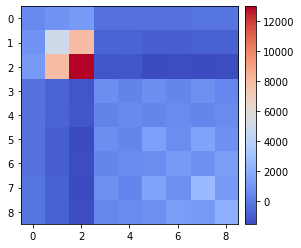

In [10]:

ax = plt.gca()

im = plt.imshow(cov_matrix, cmap = "coolwarm")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

plt.colorbar(im, cax=cax)
plt.show()

**Observations**
* The determinant of a positive definite matrix is always positive, so a positive definite matrix is always nonsingular.
* All its eigenvalues are positive.

In [49]:
np.linalg.det(cov_matrix)

1.876727730232176e+25

In [53]:
w, v = np.linalg.eigh(cov_matrix)
print(f"Shape w: {w.shape}, shape v: {v.shape}")

print(f"Eigenvalues: {w}")

Shape w: (9,), shape v: (9, 9)
Eigenvalues: [   65.20077801   126.64085769   194.40186278   255.1979941
   371.96660592   801.68194709  1671.58098988  4807.38404361
 19118.53781904]


Now, we have represented one image by one covariance matrix. 

What about more images ?

In [15]:
import torch
import torchvision
import torchvision.transforms as transforms

In [18]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 30

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


loading images...shape: torch.Size([30, 3, 32, 32])


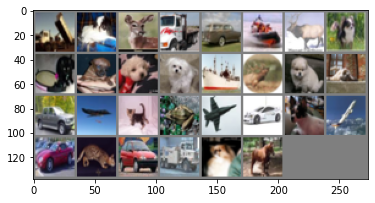

In [40]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(f"loading images...shape: {images.shape}")
# show images
imshow(torchvision.utils.make_grid(images))


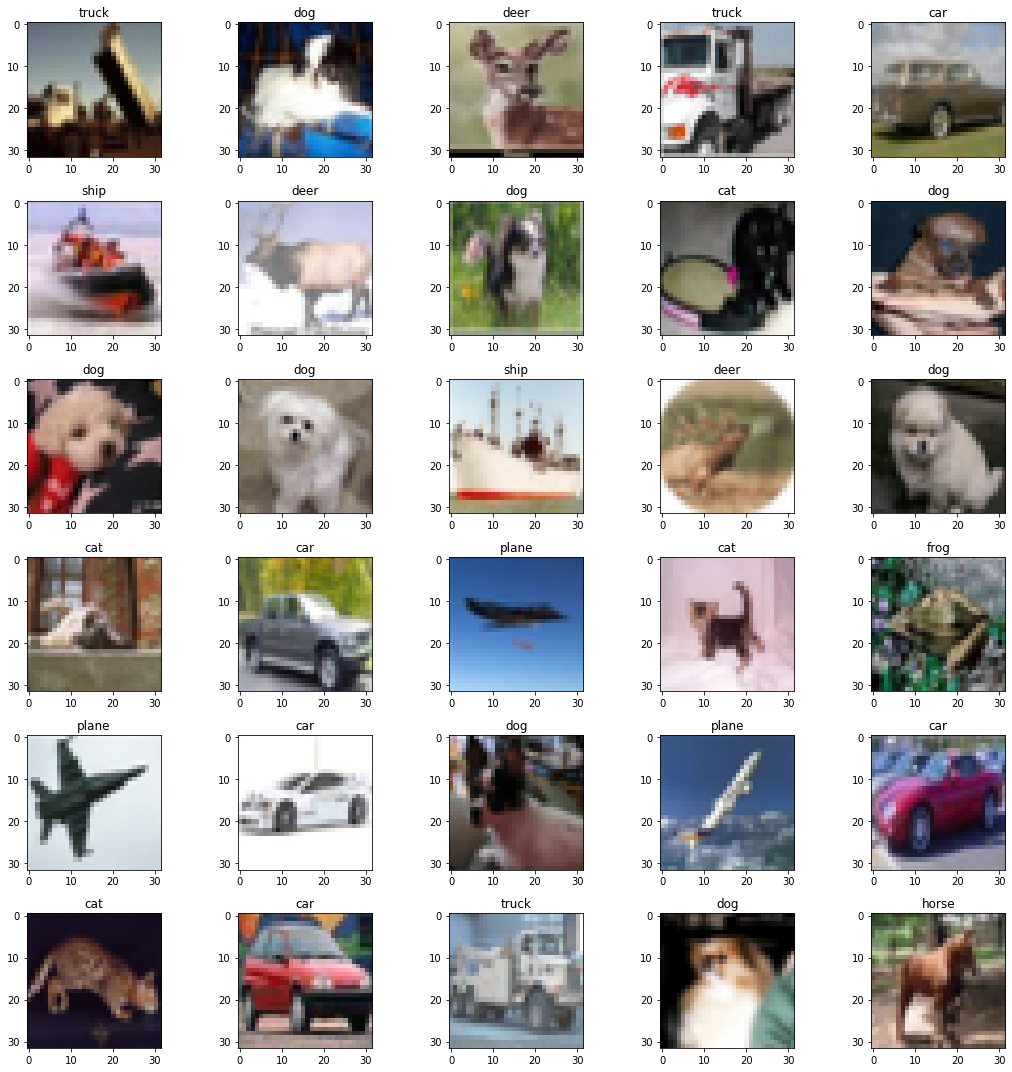

In [47]:
n_rows, n_cols = 6,5

fig, axs = plt.subplots(n_rows, n_cols, figsize=(15,15))
count = 0
for i in range(n_rows):
  for j in range(n_cols):
    img = images[count] / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    axs[i,j].imshow(np.transpose(npimg, (1, 2, 0)))
    axs[i,j].set_title(str(classes[labels[count]]))
    count +=1

plt.tight_layout()
plt.show()


How can we measure similarities between **images**?

# Reto

Plot the covariance matrix for each image using the previous features **texto en negrita**

In [48]:
#---> CODE!

# References

* https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
* Book: [Covariances in Computer Vision and Machine Learning]